<h1> Laboratorio 3</h1>
<h3>Angel Higueros <br> 20460 </h3>



In [58]:

'''
Task 1.1
Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un 
p.array para ser trabajado en el notebook.
'''

import pandas as pd
import numpy as np

# leer el archivo CSV usando pandas
data = pd.read_csv('kc_house_data.csv')

# extraer las columnas de interés y convertirlas a flotantes
X = data['sqft_living'].astype(float).values.reshape(-1, 1)
y = data['price'].astype(float).values.reshape(-1, 1)

# agregar una columna de unos a la matriz de características
Xr = np.hstack((np.ones_like(X), X))
Xr



array([[1.00e+00, 1.18e+03],
       [1.00e+00, 2.57e+03],
       [1.00e+00, 7.70e+02],
       ...,
       [1.00e+00, 1.02e+03],
       [1.00e+00, 1.60e+03],
       [1.00e+00, 1.02e+03]])

In [59]:
'''
Task 1.2
Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que 
relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos 
(price - sqft living).

Task 1.3
Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto
en clase).
'''

import matplotlib.pyplot as plt

# definir las variables de entrada y salida
def lineal_regression(X, y, a=0.1, iterations=100):
    m, n = X.shape
    t = np.random.rand(Xr.shape[1], 1)
    costs = []

    for _ in range(iterations):

        # Calcular la hipótesis y el costo
        cost = ((X @ t - y) ** 2).sum() / len(y)
        costs.append(cost)

        # Actualizar los parámetros utilizando el descenso de gradiente
        gradient = 2 * X.T @ (X @ t - y) / len(y)
        t -= a * gradient


    return t, costs


# Agregar características polinomiales
X_poly = np.hstack((X, X ** 2, X ** 3, X ** 4))

# Normalizar las características
X_poly_norm = (X_poly - np.mean(X_poly, axis=0)) / np.std(X_poly, axis=0)

# Agregar una columna de unos a la matriz de características
X_poly_norm = np.hstack((np.ones((X_poly_norm.shape[0], 1)), X_poly_norm))

# Entrenar el modelo
tf, costs = lineal_regression(Xr, y, a=0.0000000025, iterations=100)
tf


array([[  0.46860717],
       [243.95840693]])

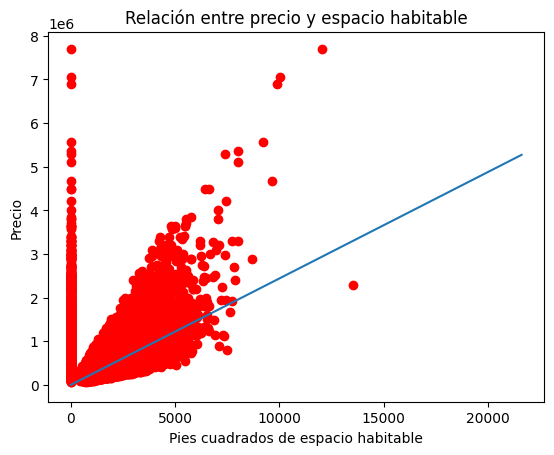

In [79]:

# Define los valores de entrada xm y xmr
xm = np.array([[0], [data.shape[0]]])
xmr = np.hstack((np.ones((2, 1)), xm))

# Calcula la predicción de la regresión lineal en base a los valores de entrada
ym = xmr @ tf

# Genera un valor aleatorio para el parámetro inicial t
to = np.random.rand(X_poly_norm.shape[1], 1)
to = to[~np.isnan(to)].reshape((len(to), 1))


# Grafica la relación entre el precio y el espacio habitable, junto con la línea de regresión
plt.plot(X, y, 'ro')
plt.plot(xm, ym)
plt.title("Relación entre precio y espacio habitable")
plt.xlabel('Pies cuadrados de espacio habitable')
plt.ylabel('Precio')
plt.show()


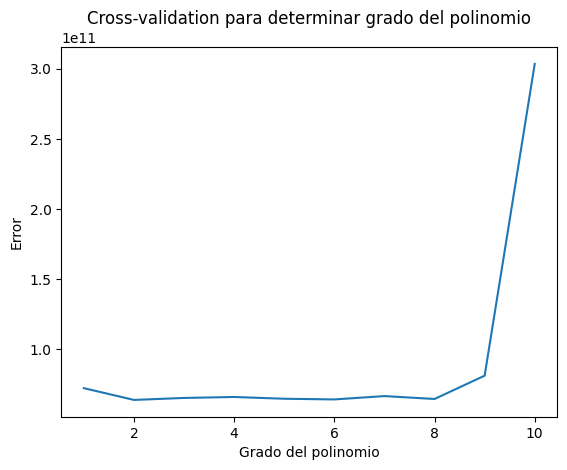

El mejor grado del polinomio es: 8


In [77]:
'''
Task 1.4
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos 
(encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos 
previamente no observados).
'''

# Division del conjunto de datos en entrenamiento y prueba
n = len(X)
indices = np.random.permutation(n)
n_train = int(n*0.8)
train_idx, test_idx = indices[:n_train], indices[n_train:]
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

# Ajuste de polinomios de diferentes grados
grados = range(1, 11)
errores = np.zeros(len(grados))

for i, grado in enumerate(grados):
    # Ajuste del polinomio
    X_train_poly = np.ones((n_train, 1))
    X_test_poly = np.ones((n - n_train, 1))
    for j in range(1, grado+1):
        X_train_poly = np.hstack((X_train_poly, X_train[:,1][:,None]**j))
        X_test_poly = np.hstack((X_test_poly, X_test[:,1][:,None]**j))
    theta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train
    # Calculo del error en el conjunto de prueba
    y_pred = X_test_poly @ theta
    errores[i] += np.mean((y_test - y_pred)**2)

# Grafica del error vs grado del polinomio
plt.plot(grados, errores)
plt.xlabel('Grado del polinomio')
plt.ylabel('Error')
plt.title('Cross-validation para determinar grado del polinomio')
plt.show()

# Seleccion del mejor grado del polinomio
errores /= grados
best_grado = np.argmin(errores) + 1
print("El mejor grado del polinomio es:", best_grado)

<h3>Task 1.5</h3>
<p><b>Haga un análisis sobre sus hallazgos.</b></p>
<br>
<p>

Despues de realizar los distintos analisis del modelo a los datos datos, podemos ver que este es relativamente preciso, en la tendencia lineal se puede ver una buena representacón de los datos. Tambien podemos concluir que el mejor grado para representar los datos es 8 ya que tiene un coeficiente alto.

<p>